# CHAPTER.05 회귀

## 01. 회귀 소개

: 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법. 통계학 용어로는 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭한다.

**머신러닝 회귀 예측의 핵심**은 주어진 피처(X)와 결정 값(y) 데이터 기반에서 하습을 통해 최적의 회귀 계수(w)를 찾아내는 것이다.
회귀에서 가장 중요한 것은 회귀 계수이다.
<img src="https://t1.daumcdn.net/cfile/tistory/997621435F3F61C01E">

여러 가지 회귀 중에서 선형 회귀가 가장 많이 사용되는데, 선형 회귀는 실제 값과 예측 값의 차이(오류의 제곱 값)을 최소화하는 직선형 회귀선을 최적화하는 방식이다.

선형 회귀 모델은 **규제(regularization) 방법**에 따라 다시 별도의 유형으로 나뉠 수 있다.(규제는 일반적인 선형 회귀의 과적합 문제를 해결하기 위해서 회귀 계수에 페널티 값을 적용하는 것을 말한다.)

- 대표적인 선형 회귀 모델
    - **일반 선형 회귀** : 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제 적용하지 않은 모델
    - **릿지(Ridge)** : 선형 회귀에 L2 규제를 추가한 회귀 모델이다. L2 규제는 상대적으로 큰 회귀 계수 값의 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제모델이다.
    - **라쏘(Lasso)** : 선형 회귀에 L1 규제를 적용한 방식이다. L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것이다. (피처 선택 기능으로도 불린다.)
    - **엘라스틱넷(ElasticNet)** : L2, L1 규제를 함께 결합한 모델. 주로 피처가 많은 데이터 세트에서 적용된다. L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정한다.
    - **로지스틱 회귀(Logistic Regression)** : 회귀라는 이름이 붙어 있지만, 사실은 분류에 사용되는 선형 모델이다. 매우 강력한 분류 알고리즘으로 이진 분류뿐만 아니라 희소 영역의 분류, 예를 들어 텍스트 분류와 같은 영역에서 뛰어난 예측 성능을 보인다.

## 02. 단순 선형 회귀를 통한 회귀 이해

단순 선형 회귀는 독립변수도 하나, 종속변수도 하나인 선형 회귀이다. 예측값 Ŷ는 w₀ + w₁ * X로 계산할 수 있다. 독립변수가 1개인 단순 선형 회귀에서는 이 기울기 w1과 절편 w0을 회귀 계수로 지칭한다. 그렇다면 실제 값은 이러한 1차 함수 값에서 실제 값만큼의 오류 값을 뺀(또는 더한) 값이 된다.

- 잔차 : 실제 값과 회귀 모델의 차이에 따른 오류 값.(남은 오류)
- 최적의 회귀 모델을 만든다는 것 
    1. 전체 데이터의 잔차(오류 값)의 합이 최소가 되는 모델을 만든다.
    2. 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수를 찾는다.

<img src="https://blog.kakaocdn.net/dn/61TQn/btqEsEDVIYR/cqybjRuqO7GIXLKgb2hK9k/img.png" height="500px" width="500px">

이렇듯 오류 값은 +나 -가 될 수 있다. 따라서 오류 합을 계산할 때는 절댓값을 취해서 더하거나(Mean Absolute Error), 오류 값의 제곱을 구해서 더하는 방식(RSS)을 취한다. 일반적으로 미분 등의 계산을 편리하게 하기 위해 RSS방식으로 오류 합을 구한다. 즉, Error² = RSS이다.

RSS를 최소로 하는 w0, w1, 즉 회귀 계수를 학습을 통해서 찾는 것이 머신러닝 기반 회귀의 핵심 사항이다. RSS는 회귀 식의 독립변수 X, 종속 변수 Y가 중심 변수가 아니라 **w 변수(회귀 계수)가 중심 변수임을 인지하는 것이 매우 중요하다**

회귀에서 RSS는 비용(Cost)이며, w 변수로 구성되는 RSS를 비용함수(손실함수 loss function)라고 한다. 


머신러닝 회귀 알고리즘은 데이터를 계속 학습하면서 이 비용 함수가 반환하는 값(즉, 오류 값)을 지속해서 감소시키고 최종적으로는 더 이상 감소하지 않는 최소의 오류 값을 구하는 것이다.

## 03. 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개

w 파라미터 개수가 적다면 고차원 방정식으로 비용 함수가 최소가 되는 W 변숫값을 도출할 수 있겠지만, w 파라미터가 많으면 고차원 방정식을 동원하더라도 해결하기 어렵다.

**경사 하강법**은 이러한 **고차원 방정식에 대한 문제를 해결해 주면서 비용 함수 RSS를 최소화하는 방법을 직관적으로 제공하는 뛰어난 방식이다.**
- 반복적으로 비용함수의 반환 값, 즉 예측 값과 실제 값의 차이가 작아지는 방향성을 가지고 w파라미터를 지속해서 보정해 나간다. 그리고 오류 값이 더 이상 작아지지 않으면 그 오류 값을 최소 비용으로 판단하고 그때의 w값을 최적 파라미터로 반환한다.

<img src="https://cdn-images-1.medium.com/max/1600/0*rBQI7uBhBKE8KT-X.png" height="500px" width="500px">
최초 w에서부터 미분을 적용한 뒤 이 미분 값이 계속 감소하는 방향으로 순차적으로 w를 업데이트한다. 마침내 더 이상 미분된 1차 함수의 기울기가 감소하지 않는 지점을 비용함수가 최소인 지점으로 간주하고 그때의 w를 반환한다.

경사 하강법은 새로운 w₁ = 이전w₁ + $\eta\frac{2}{N}\sum _{i=1}^n$xᵢ*(실제값ᵢ - 예측값ᵢ), 새로운 w₀ = 이전w₀ + $\eta\frac{2}{N}\sum _{i=1}^n$xᵢ*(실제값ᵢ - 예측값ᵢ)을 반복적으로 적용하면서 비용 함수가 최소가 되는 값을 찾는다.

간단한 회귀식인 y = 4X + 6을 근사하기 위한 100개의 데이터 세트를 만들고, 여기에 경사 하강법을 이용해 회귀계수 𝑤₁,𝑤₀을 도출해보자

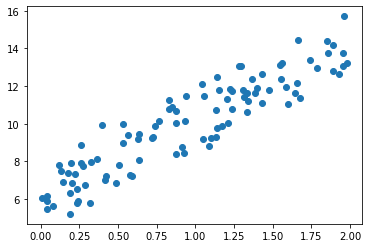

In [1]:
# 단순 선형 회귀로 예측할 만한 데이터 세트 먼저 만들기

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6을 근사(𝑤₁=4,𝑤₀=6), 임의의 값은 노이즈를 위해 만듦.
X = 2 * np.random.rand(100, 1)
y = 6 + 4* X + np.random.randn(100, 1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y)

- .rand() : 0부터 1사이의 균일한 확률 분포로 실수 난수를 생성
- .randn() : 기댓값이 0이고 표준편차가 1인 가우시안 표준 정규 분포를 따르는 난수를 생성

In [8]:
# 비용함수(RSS) 정의

def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred)) / N
    return cost

In [5]:
# 경사 하강법을 함수를 생성해 구현하기
# w1과 w0을 모두 0으로 초기화한 뒤 iters 개수만큼 반복하면서 w1과 w0을 업데이트한다.

# w1과 w0를 업데이트할 w1_update, w0_update를 반환
# X와 y는 위에서 무작위로 생성한 값. 둘다 넘파이 ndarray이다.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 에측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
    
    # w0_update를 dot 초렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N, 1))
    
    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N) * learning_rate * (np.dot(X.T, diff))
    w0_update = -(2/N) * learning_rate * (np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

- numpy.dot : numpy array를 곱할 때 사용한다.
- numpy.ndarray.T : 2차원 행렬 전치

In [7]:
# get_weight_updates()를 경사 하강 방식으로 반복적으로 수행하여 w1과 w0을 업데이트하는 함수 만들기

# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용한다.
def gradient_descent_steps(X, y, iters=10000):
    # w0과 w1를 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters만큼 반복적으로 get_weight_updates()호출해 w1, w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [9]:
# w1, w0 값 구하고 get_cost() 함수를 이용해 경사 하강법의 예측 오류 계산하기

w1, w0 = gradient_descent_steps(X, y, iters=10000)
print("w1: {0:.3f} w0: {1:.3f}".format(w1[0, 0], w0[0, 0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))

w1: 3.968 w0: 6.222
Gradient Descent Total Cost: 0.9924


실제 선형식인 y = 4X + 6과 유사하게 w1은 3.968, w0은 6.222가 도출되었다. 예측 오류 비용은 약 0.9924이다.

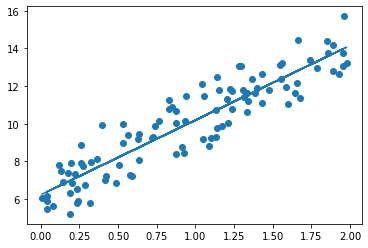

In [12]:
# 앞에서 구한 y_pred에 기반해 회귀선 그리기
plt.scatter(X, y)
plt.plot(X, y_pred)

일반적으로 경사 하강법은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트하기 때문에 수행시간이 매우 오래 걸린다는 단점이 있다.

그때문에 실전에서는 대부분 **확률적 경사 하강법(Stochastic Gradint Descent)**를 이용한다. 
- 전체 입력 데이터로 w가 업데이트 되는 값을 계산하는 것이 아니라 일부 데이터만 이용해 w가 업데이트 되는 값을 계산하므로 경사 하강법에 비해서 빠른 속도를 보장한다.
    - 따라서 대용량의 데이터의 경우 대부분 확률적 경사 하강법이나 미니 배치 확률적 경사 하강법을 이용해 최적 비용함수를 도출한다.

In [16]:
# (미니 배치) 확률적 경사 하강법 함수로 구현하기
"""
앞에서 생성한 gradient_descent_steps()와 크게 다르지 않다.
다만 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해, 
이를 기반으로 w1_update, w0_update를 계산하는 부분만 차이가 있다.
"""

def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000) :
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤(permutation()이용)하게 batch_size 만큼 데이터를 추출해 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 bath_size만큼 추출된 데이ㅓ 기반으로 w1_update, w0_date 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [17]:
# w1, w0 및 예측 오류 비용 계산

w1, w0 = stochastic_gradient_descent_steps(X, y, iters=10000)
print("w1: ", round(w1[0, 0], 3), "w0: ", round(w0[0, 0], 3))
y_pred = w1[0, 0] * X + w0
print('Stochastic Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))

w1:  3.988 w0:  6.244
Stochastic Gradient Descent Total Cost: 0.9942


(미니 배치) 확률적 경사 하강법으로 구한 w0, w1 결과는 경사 하강법으로 구한 w1, w0와 큰 차이가 없으며, 예측 오류 비용 또한 0.9924로 경사 하강법으로 구한 예측 오류 비용 0.9942보다 아주 조금 높을 뿐으로 큰 예측 성능상의 차이가 없음을 알 수 있다. 따라서 큰 데이터를 처리할 경우에는 경사 하강법은 매우 시간이 오래 걸리므로 일반적으로 확률적 경사 하강법을 이용한다.

**피처가 여러 개인 경우, 회귀 계수 도출하기**
- 피처가 여러개인 경우도 1개인 경우를 확장해 유사하게 도출할 수 있다.
- 피처가 M개 있다면 그에 따른 회귀 계수도 M + 1(1개는 w0)개로 도출된다.
- 회귀 계수가 많아지더라도 선형대수를 이용해 간단하게 예측값을 도출할 수 있다.
- 데이터의 개수가 N이고 피처 M개의 입력 행렬을 Xmat, 회귀 계수 w1, w2 ... w100을 W 배열로 표기하면 예측 행렬 Ŷ = np.dot(Xmat, W) + w0로 구할 수 있다.

## 04. 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측
### LinearRegression 클래스 - Ordinary Least Squares

: 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화해 OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스이다.
LinearRegression 클래스는 fit()메서드로 X, y 배열을 입력 받으면 회귀 계수(Coefficients)인 w를 coef_속성에 저장한다.

In [ ]:
class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False,
                                           copy_X=True, n_jobs=1)

- 입력 파라미터
    - **fit_intercept** : 불린 값으로, 디폴트는 True. intercept(절편) 값을 계산할 것인지 말지를 지정한다. False로 지정하면 intercept가 사용되지 않고 0으로 지정된다.
    - **normalize** : 불린 값으로 디폴트는 False이다. fit_intercept가 False인 경우에는 파라미터가 무시된다. True이면 회귀를 수행하기 전에 입력 데이터 세트를 정규화한다.


- 속성
    - **coef_** : fit() 메서드를 수행했을 때 회귀 계수가 배열 형태로 저장하는 속성. shape는 (target 값 개수, 피처 개수)
    - **intercept_** : intercept 값

Ordinary Least Squares(최소제곱법, 최소자승법) 기반의 회귀계수 계산은 입력 피처의 독립성에 많은 영향을 받는다. 피처간의 상관관계가 매우 높은 경우 분산이 매우 커져 오류에 매우 민감해진다. 이를 **다중 공선성(multi-collinearity)**문제라 한다.

### 회귀 평가 지표
: 실제 값과 회귀 예측 값의 차이 값을 기반으로한 지표가 중심
- **MAE** : |실제값 - 예측값|의 평균
- **MSE** : (실제값 - 예측값)²의 평균
- **RMSE** : MSE에 루트를 씌운것
- **R²** : 예측값의 분산 / 실제 값의 분산. 1에 가까울수록 예측 정확도가 높다.


cross_val_score, GridSearchCV와 같은 **scoring 함수에 회귀 평가 지표를 적용할 때 한가지 유의할 점**

'neg_mean_absolute_error'(MAE)가 의미하는 것은 -1 * metrics.mean_absolute_error()이다. 


왜냐하면 사이킷런의 scoring함수가 score값이 클수록 좋은 평가 결과로 자동 평가하기 때문이다. 그런데 회귀 평가 지표의 경우 값이 커지면 오히려 나쁜 모델이라는 의미이므로 이를 사이킷런 scoring 함수에 일반적으로 반영하려면 보정이 필요하다. 따라서 -1을 평가 지표 값에 곱해서 음수를 만들어 작은 오류 값이 더 큰 숫자로 인식하게 한다.

### LinearRegression을 이용해 보스턴 주택 가격 회귀 구현
LinearRegression 클래스를 이용해 선형 회귀 모델 만들기

In [2]:
# 해당 데이터 세트를 로드하고 데이터프레임으로 변경하기

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이터 세트 로드
boston = load_boston()

# boston 데이터 세트 데이터프레임 변환
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

# boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICE 칼럼으로 데이터프레임에 추가함
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기 : ', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기 :  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


데이터 세트 피처의 Null값은 없으며 모두 float형이다.

- seaborn의 regplot() : X, Y축 값의 산점도와 함께 선형 회귀 직선을 그려준다.
- matplotlib.subplots() : 여러개의 그래프를 한번에 표현하기 위해 자주 사용
    - 인자
        - ncols : 열 방향으로 위치할 그래프의 개수
        - nrows : 행 방향으로 위치할 그래프의 개수

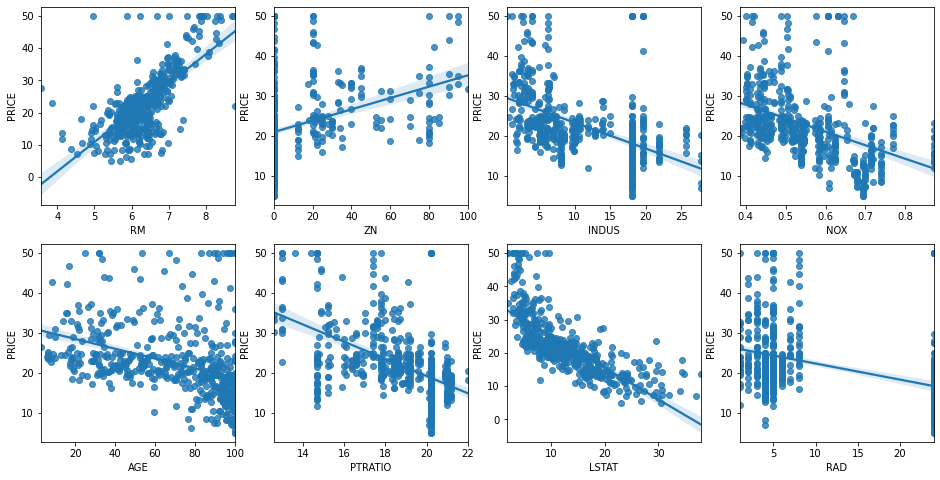

In [23]:
# 각 칼럼이 회귀 결과에 미치는 영향이 어느 정도인지 시각화하여 알아보기
# 8개의 칼럼에 대해 값이 증가할수록 PRICE값이 어떻게 변하는지 확인

# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐
# 각 ax마다 칼럼과 PRICE의 관계를 표현
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현s
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

RM과 LSTAT의 PRICE 영향도가 가장 두드러지게 나타난다.

RM(방 개수)는 양방향의 선형성(Positive Linearity)이 가장 크다. 즉, 방의 크기가 클수록 가격이 증가하는 것을 확연히 보여준다. LSTAT(하위 계층의 비율)는 음 방향의 선형성(Negative Linearity)이 가장 크다. LSTAT이 적을수록 PRICE가 증가하는 모습이 확연히 나타난다.

In [4]:
# LinearRegression 클래스를 이용해 보스턴 주택 가격의 회귀 모델 만들기

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3,
                                                   random_state=156)

In [26]:
# 선형 회귀로 OLS 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE: {0:.3f}, RMSE: {1:.4f}'.format(mse, rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE: 17.297, RMSE: 4.1590
Variance score: 0.757


In [27]:
# LinearRegression으로 생성한 주택가격 모델의 inercept(절편)과 coefficients(회귀 계수)값 구하기

print('절편 값: ', lr.intercept_)
print('회귀 계수값: ', np.round(lr.coef_, 1))

절편 값:  40.995595172164336
회귀 계수값:  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [28]:
# coef_ 속성은 회귀 계수 값만 가지고 있다.
# 따라서 이를 피처별 회귀 계수 값으로 다시 매핑하고, 높은 값순으로 출력

# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의 !
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

RM이 양의 값으로 회귀 계수가 가장 크다. NOX 피처의 회귀 계수 - 값이 너무 크다.

In [32]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
# cross_val_score()의 인자로 scoring='neg_mean_squred_error'를 지정하면 반환되는 수치 값은 음수
# 따라서 cross_val_score()에서 반환된 값에 다시 -1를 곱해야 양의 값인 원래 모델에서 계산된 MSE값이 된다.
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores:  [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE: 5.829


## 05. 다항 회귀와 과(대)적합 / 과소적합 이해
### 다항 회귀 이해

- **다항(Polynomial) 회귀** : 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것
    - y = w0 + w1*x1 + w2*x2 + w3*x1*x2 + w4*w1² + w5*x2²
- 주의할 점 : 다항 회귀를 비선형 회귀로 혼동하기 쉽지만, 다항 회귀는 선형 회귀라는 것이다.
    - 회귀에서 선형/비선형 회귀를 나누는 기준은 회귀 계수가 선형/비선형인지에 따른 것이지 독립변수의 선형/비선형 여부와는 무관하다.

사이킷런은 다항 회귀를 위한 클래스를 명시적으로 제공하지 않는다. 대신 다항 회귀 역시 선형 회귀 이기 때문에 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현한다. 이를 위해 사이킷런은 **PolynomialFeatures 클래스**를 통해 피처를 Polynomial(다항식) 피처로 변환한다.
- PolynomialFeatures 클래스는 **degree 파라미터**를 통해 입력받은 단항식 피처를 degree에 해당하는 다항식 피처로 변환한다.

In [1]:
# PolynomialFeautres를 이용해 단항값을 2차 다항값으로 변환하는 예제

from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0, 1], [2, 3]]의 2x2 행렬 생성
X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 피처:\n', X)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


이렇게 변환된 Polynomial 피처에 선형 회귀를 적용해 다항 회귀를 구현한다.

In [2]:
# 3차 다항 계수를 이용해 3차 다항 회귀 함수식을 PolynomialFeatures와 LinearRegression 클래스를 이용해 유도하기
# 이를 위해 3차 다항 회귀 함수를 임의로 설정하고 이의 회귀 계수 예측

# 3차 다항 계수 피처 값이 입력되면 결정 값을 반환한다.
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 feature: \n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [3]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]


단항 계수 피처 [x₁, x₂]를 3차 다항 계수 [1, x₁, x₂, x₁², x₁x₂, x₂², x₁³, x₁²x₂, x₁x₂², x₁³]와 같이 10개의 다항 계수로 변환했다.

In [5]:
# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomail 회귀 Shape :', model.coef_.shape)

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomail 회귀 Shape : (10,)


회귀 계수도 10개로 늘어난 것을 알 수 있다.

원래 다항식 계수 값인 [1, 2, 0, 3, 0, 0, 0, 0, 0, 4]와는 차이가 있지만 다항 회귀로 근사하고 있음을 알 수 있다.

→ 이처럼 사이킷런은 PolynomialFatures로 피처를 변환한 후에 LinearRegression 클래스로 다항 회귀를 구현한다.

#### Pipeline 객체 이용
피처 변환과 선형 회귀 적용을 각각 별도로 하지 않고, 한 번의 다항 회귀를 구현하기. 여러 처리 단계를 하나의 scikit-learn 추정기 형태로 묶어준다.

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X) :
    y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
    return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                 ('linear', LinearRegression())])
X = np.arange(4).reshape(2, 2)
y = polynomial_func(X)

model = model.fit(X, y)

# named_steps : 단계 이름을 키로 가진 딕셔너리 형태. 파이프라인의 각 단계에 쉽게 접근 가능하다.
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항 회귀를 이용한 과소적합 및 과적합 이해

다항 회귀는 피처의 직선적 관계가 아닌 복잡한 다항 관계를 모델링할 수 있다. 다항식의 차수가 높아질수록 매우 복잡한 피처 간의 관계까지 모델링이 가능하다.

하지만! 다항 회귀의 차수(degree)를 높일수록 학습 데이터에만 너무 맞춘 학습이 이뤄져서 정작 테스트 데이터 환경에서는 오히려 예측 정확도가 떨어진다. **즉, 차수가 높아질수록 과적합의 문제가 크게 발생한다.**

In [7]:
# 다항 회귀를 이용해 과소적합과 과적합의 문제를 잘 보여주는 예제

# 소스코드 설명
# 원래 데이터 세트는 피처 X와 target y가 잡음이 포함된 다항식의 코사인 그래프 관계를 가지도록 만들어준다.
# 그리고 이에 기반해 다항 회귀의 차수를 변화시키면서 그에 따른 회귀 예측 곡선과 예측 정확도를 비교하는 예제

# 학습데이터응 30개의 임의의 데이터인 X, 그리고 X의 코사인 값에서 약간의 잡음 변동 값을 더한 target인 y로 구성된다.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터이다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값이다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.40772896250986834 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.04320874987231718 입니다.

Degree 15 회귀 계수는 [-2.98295000e+03  1.03899930e+05 -1.87417069e+06  2.03717225e+07
 -1.44873988e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08] 입니다.
Degree 15 MSE는 182815433.5604608 입니다.


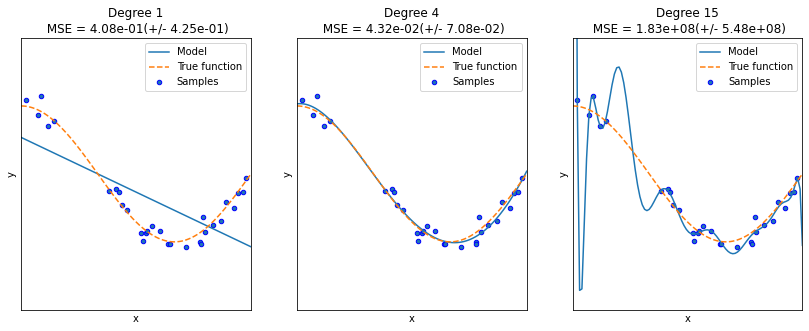

In [8]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교한다.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                        ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차검증으로 다항 회귀 평가
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i], -1 * np.mean(scores)))
    
    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    # 실제값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\n MSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()

실선으로 표현된 예측 곡선은 다항 회귀 예측 곡선이다. 점선으로 표현된 곡선은 실제 데이터 세트 X, Y의 코사인 곡선이다.
- Degree 1 예측 곡선은 단순한 직선으로서 단순 선형 회귀와 똑같다. 예측 곡선이 학습 데이터의 패턴을 제대로 반영하지 못하고 있는 과소적합 모델이 되었다.

- Degree 4 예측 곡선은 실제 데이터 세트와 유사한 모습이다. 변동하는 잡음까지 예측하지는 못했지만, 학습 데이터 세트를 비교적 잘 반영해 코사인 곡선 기반으로 테스트 데이터를 잘 예측한 곡선을 가진 모델이 되었다. MSE값도 가장 높다.

- Degree 15 예측 곡선은 MSE값이 182815432가 될 정도로 어처구니 없는 오류 값이 발생했다. 데이터 세트의 변동 잡음 값까지 지나치게 반영한 결과, 예측 곡선이 학습 데이터 세트만 정확히 예측하고, 테스트 값의 실제 곡선과는 완전히 다른 형태의 예측 곡선이 만들어졌다. 결과적으로 학습 데이터에 너무 충실하게 맞춘 과적합이 심한 모델이 되었다.


결국 좋은 예측 모델은 학습 데이터의 패턴을 잘 반영하면서도 복잡하지 않은 균형 잡힌 모델을 의미한다.

### 편향-분산 트레이드오프(Bias-Variance Trade off)
- degree 1과 같은 모델은 매우 단순화된 모델로서 지나치게 한 방향성으로 치우친 경향이 있다. 이런 모델을 **고편향(High Bias)**성을 가졌다고 표현한다.
- degree 15와 같은 모델은 학습 데이터 하나하나의 특성을 반영하면서 매우 복잡한 모델이 되었고 지나치게 높은 변동성을 가지게 되었다. 이런 모델을 **고분산(High Variance)**성을 가졌다고 표현한다.

<img src="http://www.endtoend.ai/assets/blog/misc/bias-variance-tradeoff-in-reinforcement-learning/front.png" height="500px" width="500px">


- 상단 왼쪽의 **저편향/저분산** : 예측 결과가 실제 결과에 매우 잘 근접하면서도 예측 변동이 크지 않고 특정 부분에 집중돼 있는 아주 뛰어난 성능을 보여준다.
- 상단 오른쪽의 **저편향/고분산** : 예측 결과가 실제 결과에 비교적 근접하지만, 예측 결과가 시제 결과를 중심으로 꽤 넓은 부분에 분포돼있다.
- 하단 왼쪽의 **고편향/저분산** : 정확한 결과에서 벗어나면서도 예측이 특정 부분에 집중돼있다.
- 하단 오른쪽의 **고편향/고분산** : 정확한 예측 결과를 벗어나면서도 넓은 부분에 분포돼 있다.

일반적으로 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향이 있다. 즉, 편향이 높으면 분산은 낮아지고(과소적합) 반대로 분산이 높으면 편향이 낮아진다(과적합)

#### 편향과 분산의 관계에 따른 전체 오류값의 변화
<img src="https://djsaunde.files.wordpress.com/2017/07/bias-variance-tradeoff.png?w=640" height="500px" width="600px">

즉, 편향과 분산이 서로 트레이트오프를 이루면서 오류 Cost값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 방법이다.

## 06. 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷
### 규제 선형 모델의 개요
회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 수 있어야한다.
- 비용함수는 학습 데이터의 잔차 오류 값을 최소로 하는 RSS 최소화 방법과 과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균형을 이뤄야한다. 
- 비용 함수 목표 = Min(RSS(W) + alpha * ∥W∥₂²)
    - (RSS(W) + alpha * ∥W∥₂²)를 최소화하는 W 벡터를 찾는 것이다.
    - alpha : 학습 데이터 적합 정도와 회귀 계수 값의 크기 제어를 수행하는 튜닝 파라미터
        - alpha 값을 크게 하면 : 비용함수는 회귀 계수 W값을 작게 해 과적합을 개선 할 수 있다.
            - alpha가 0인 경우, 비용함수는 Min(RSS(W))이다.
        - alpha 값을 작게 하면 : 회귀 계수 W의 값이 커져도 어느 정도 상쇄가 가능하므로 학습 데이터 적합을 더 개선할 수 있다.
            - alpha가 무한대인 경우,  alpha * ∥W∥₂²도 무한대가 되므로 비용함수는 W를 0에 가깝게 최소화 해야한다.
        - alpha를 0에서부터 지속적으로 값을 증가시키면서 회귀 계수 값의 크기를 감소시킬 수 있다. 

- **규제** : 비용함수에 alpha 값으로 페널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식
- **L2 규제** : alpha * ∥W∥₂²와 같이 W의 **제곱**에 대해 페널티 부여하는 방식
- **L1 규제** : alpha * ∥W∥₁와 같이 W의 **절댓값**에 대해 페널티 부여. 영향력이 크지 않은 회귀 계수 값 0으로 변환


W를 줄인다 -> 규제를 통해 필요없는 변수의 크기를 줄여서(아님 0으로) 영향도를 작게 만든다.

### 릿지 회귀
- Ridge 클래스를 통해 릿지 회귀 구현
    - 주요 생성 파라미터
        - alpha : L2 규제 계수

In [8]:
# 보스턴 주택 가격 Ridge클래스를 이용해 다시 예측하고, 예측 성능 cross_val_score()로 평가
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha=10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha = 10)
# LinearRegression 예제에서 사용한 데이터 세트 이용
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print('5 folds의 개별 RMSE scores: ', np.round(rmse_scores, 3))
print('5 folds의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores:  [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE: 5.518


앞 예제의 규제 없는 선형회귀의 RMSE 평균 값 5.836보다 더 뛰어난 예측 성능을 보인다.

In [10]:
# 릿지 alpha값 변화시키면서 RMSE와 회귀 계수 값의 변화 살펴보기

# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    # cross_val_score를 이용해 5폴드의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0}일 때 5 folds의 평균 RMSE: {1:.3f}'.format(alpha, avg_rmse))

alpha 0일 때 5 folds의 평균 RMSE: 5.829
alpha 0.1일 때 5 folds의 평균 RMSE: 5.788
alpha 1일 때 5 folds의 평균 RMSE: 5.653
alpha 10일 때 5 folds의 평균 RMSE: 5.518
alpha 100일 때 5 folds의 평균 RMSE: 5.330


alpha가 100일때 평균 RMSE가 5.330으로 가장 좋다.

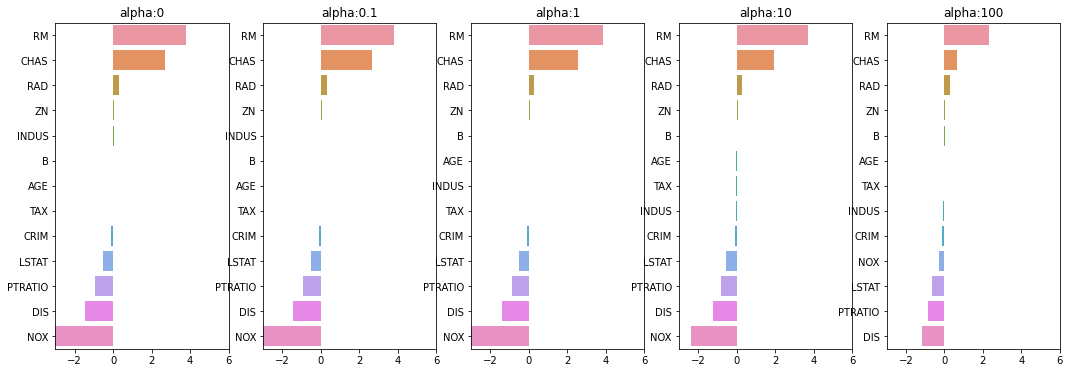

In [11]:
# alpha 값의 변화에 따른 피처 회귀 계수 값을 가로 막대 그래프로 시각화

# 각 alpha에 따른 회귀 계수 값을 시각화 하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 Dataframe 생성
coeff_df = pd.DataFrame()

# alpha 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    # alpha에 따른 피처별로 회귀 계수를 series로 변환하고 ㅇㅣ를 dataframe의 칼럼으로 ㅊㅜ가
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

# for문 바깥에서 맷 플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 dataframe으로 표시
plt.show()

alpha 값을 계속 증가시킬수록 회귀 계수 값은 지속적으로 작아짐을 알 수 있다. (특히 NOX피처)

In [12]:
# dataframe에 저장된 alpha값의 변화에 따른 릿지 회귀 계수 값 구하기
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764
